In [1]:
'''
Random Forest Classifier for Predicting Heart Disease Risk
This model predicts which patients will develop heart disease within a certain time to save lives and reduce diagnosis costs.
Author: Bilal Kudaimi
Date: 2022-05-07
'''

#Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
heart_df = pd.read_csv('heart_2020_cleaned.csv')
heart_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#Viewing the shape of the dataset
heart_df.shape

(319795, 18)

In [4]:
#There should be no NA values, so a check will be run
heart_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

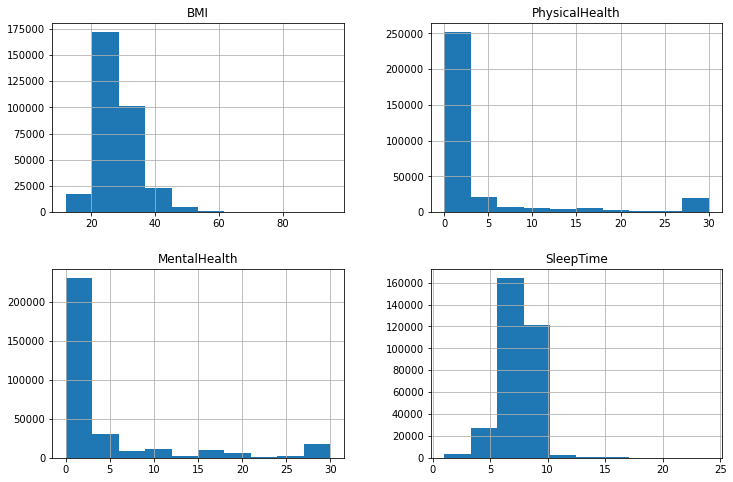

In [5]:
#Viewing histograms of the non-categorical variables
heart_df.hist(figsize = (12, 8))
plt.show()

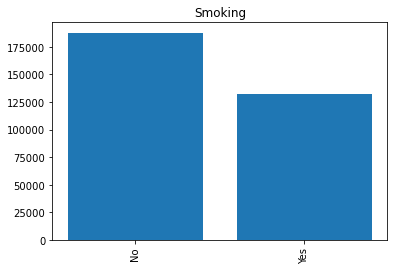

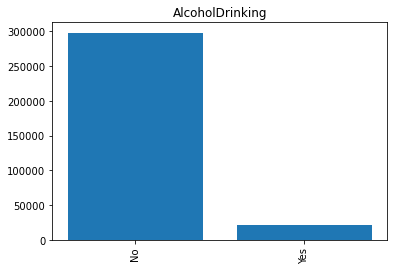

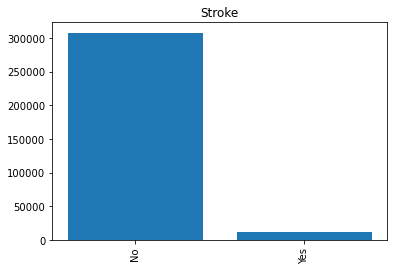

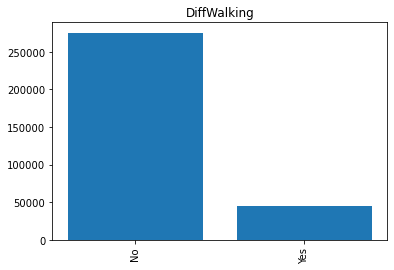

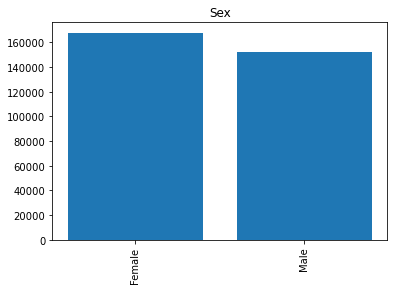

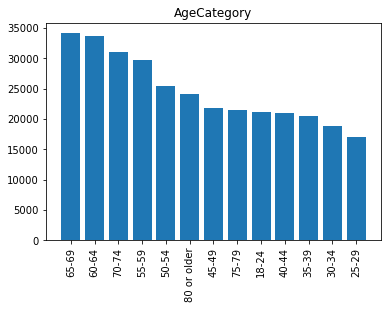

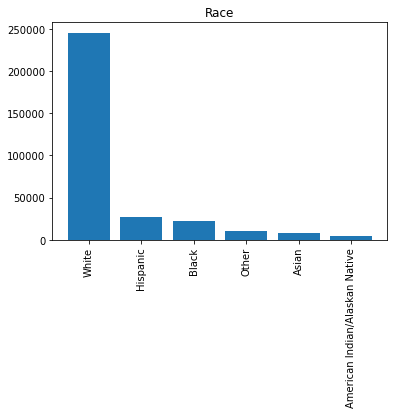

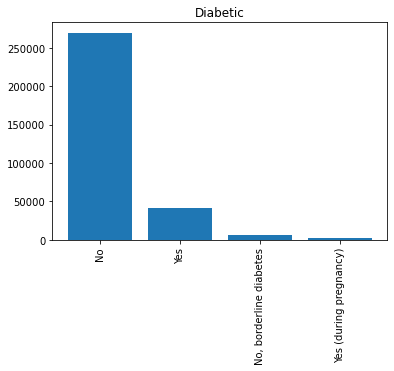

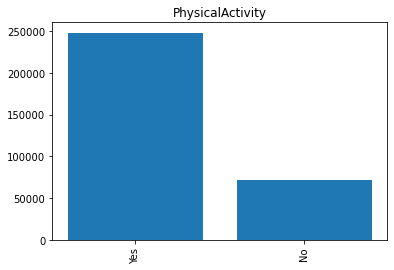

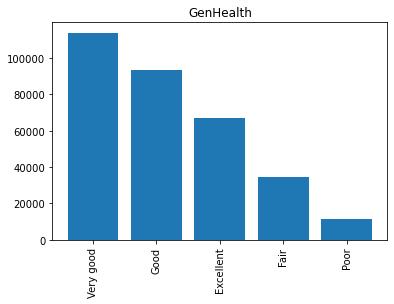

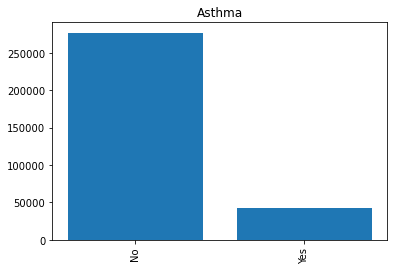

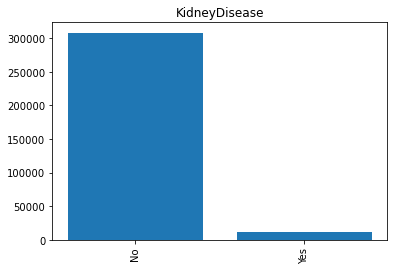

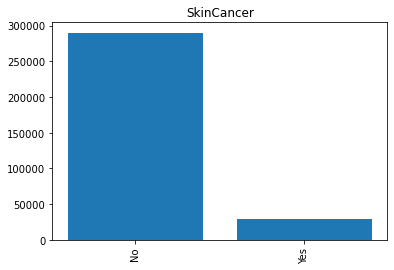

In [6]:
#Viewing bar charts of the categorical variables
cat_list = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 
            'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for i in cat_list:
    A = heart_df[i].value_counts().index
    B = heart_df[i].value_counts().values
    plt.bar(A, B)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

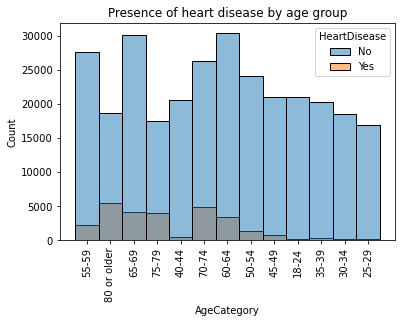

In [7]:
#Viewing a bar chart of the age categories split by the presence of heart disease
sns.histplot(data = heart_df, x = "AgeCategory", hue = "HeartDisease")
plt.title('Presence of heart disease by age group')
plt.xticks(rotation = 90)
plt.show()

In [8]:
#Defining lists and dictionaries to replace the string values of the columns with numerical values 
#This will allow a classification model to be trained on the data
lst1 = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 
        'Stroke', 'DiffWalking', 'PhysicalActivity', 
        'Asthma', 'KidneyDisease', 'SkinCancer']

binary_dict = {'No' : 0, 'Yes' : 1}

diff_binary_dict = {'No' : 0, 'No, borderline diabetes' : 0, 'Yes (during pregnancy)' : 1, 'Yes' : 1}
    
gender_dict = {'Male' : 0,'Female' : 1}

age_dict = {'18-24' : 0, '25-29' : 1, '30-34' : 2, 
            '35-39' : 3, '40-44' : 4, '45-49' : 5, 
            '50-54' : 6, '55-59' : 7, '60-64' : 8, 
            '65-69' : 9, '70-74' : 10, '75-79' : 11, 
            '80 or older' : 12}

race_dict = {'White' : 0, 'Hispanic' : 1, 'Black' : 2, 'Asian' : 3, 'American Indian/Alaskan Native' : 4, 'Other' : 5}

health_dict = {'Excellent' : 0, 'Very good' : 1, 'Good' : 2, 'Fair' : 3, 'Poor' : 4}

#Replacing the Yes and No columns with 1 and 0, respectively
for i in lst1:
    heart_df[i].replace(binary_dict, inplace = True)

#These columns are multiclass so each class will be assigned an integer starting from 0 using the above dictionaries
heart_df['Diabetic'].replace(diff_binary_dict, inplace = True)
heart_df['Sex'].replace(gender_dict, inplace = True)
heart_df['AgeCategory'].replace(age_dict, inplace = True)
heart_df['Race'].replace(race_dict, inplace = True)
heart_df['GenHealth'].replace(health_dict, inplace = True)

In [9]:
#Viewing the dataset now
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,1,1,0,3,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,1,0,1,1,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,1,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,1,0,0,2,12.0,0,0,0


In [10]:
#Checking the type of each column to make sure no strings remain
for i in heart_df.columns:
    if heart_df[i].dtype in ['int64', 'float64']:
        print('This is a numerical column')
    else:
        print('This is not a numerical column')

This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column
This is a numerical column


In [11]:
#Describing the dataset
heart_df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,0.540897,0.135590,0.775362,1.404972,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.192394,0.342353,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


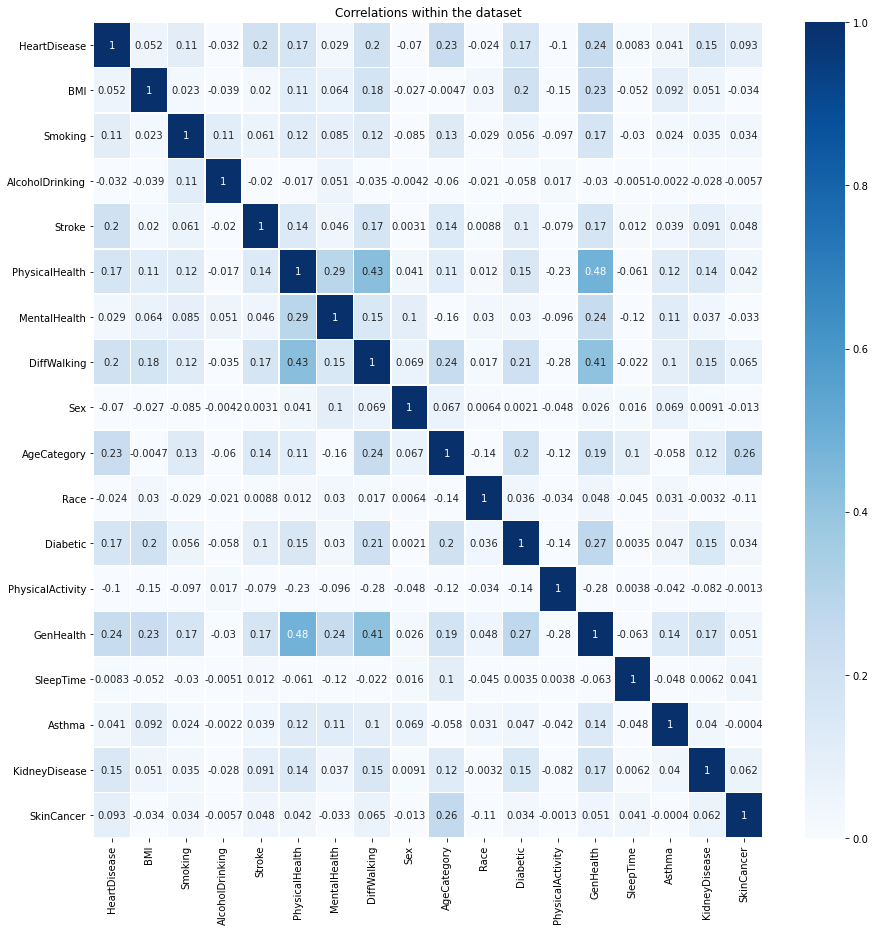

In [12]:
#Checking to see if there are little to no correlations between the dataset columns
#Correlated variables introduce bias, so no correlation is desirable

plt.figure(figsize=(15, 15))
sns.heatmap(heart_df.corr(), vmin = 0, vmax = 1, annot = True, linewidths = 0.5, cmap = 'Blues')
plt.title('Correlations within the dataset')
plt.show()

#There are little or no correlations within the dataset which is ideal

In [13]:
#Viewing how many patients did or did not have heart disease when the dataset was made
heart_df['HeartDisease'].value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [14]:
#The target variable has more instances of 0 than 1, so it must be rebalanced to avoid getting a biased model
#Oversampling the minority class will balance the classes and increase the dataset size as well
 
No_count, Yes_count = heart_df['HeartDisease'].value_counts()

CHD_yes = heart_df[heart_df['HeartDisease'] == 1]
CHD_no = heart_df[heart_df['HeartDisease'] == 0]

CHD_yes = CHD_yes.sample(No_count, replace = True)
heart_df = pd.concat([CHD_no, CHD_yes], axis = 0)
heart_df = heart_df.sample(frac = 1)

In [15]:
#Splitting the target column from the rest of the data frame
x = heart_df.drop(["HeartDisease"], axis = 1)
y = heart_df['HeartDisease'].values

In [16]:
#Splitting into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
#Training and testing the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [18]:
#Getting the accuracy and precision of the model and rounding
rounded_accuracy = round(accuracy_score(y_test, y_pred), 3)*100
rounded_precision = round(precision_score(y_test, y_pred), 3)*100

print("Accuracy: {} percent".format(rounded_accuracy))
print("Precision: {} percent".format(rounded_precision))

#The accuracy and precision are both very high, indicating that this model is safe to use for heart disease prediction

Accuracy: 96.89999999999999 percent
Precision: 94.19999999999999 percent
